In [15]:

import imageio
from PIL import Image

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# classifiers
from diffprivlib.models import KMeans
from sklearn.neighbors import KNeighborsClassifier
#connect this file to notebook
import string


In [16]:
numberSet = load_digits()
print(numberSet.data.shape)

(1797, 64)


In [17]:
#Features -> X, Target -> Y
train_features,test_features,train_target,test_target = train_test_split(numberSet.data, numberSet.target, test_size=0.3)

In [18]:
print("--------------\nTrain and test K-nn clustering from scikit learn\n")
knModel = KNeighborsClassifier().fit(train_features,train_target)
kpred = knModel.predict(test_features)
knnAccuracy = accuracy_score(test_target, kpred)*100
print("Sklearn KNN Accuracy: ",knnAccuracy, "% !")

--------------
Train and test K-nn clustering from scikit learn

Sklearn KNN Accuracy:  98.51851851851852 % !


In [19]:
print("--------------\nTrain and test K-means clustering from IBM diffPriv Library")
KmeansModel = KMeans().fit(train_features,train_target)
KmeansPredict = KmeansModel.predict(test_features)
kmAccuracy = accuracy_score(test_target, KmeansPredict)*100
print( "IBM KMeans Accuracy:",kmAccuracy, "% !\n")
print("----------------No bounds were given in the finals instruction.\n")

--------------
Train and test K-means clustering from IBM diffPriv Library
IBM KMeans Accuracy: 10.185185185185185 % !

----------------No bounds were given in the finals instruction.

C:\Users\Victor\anaconda3\lib\site-packages\diffprivlib\models\k_means.py:131: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)


----------
Comparing Models



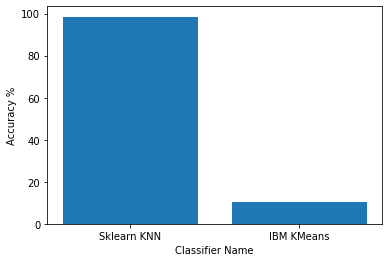

In [20]:
print("----------\nComparing Models\n")
classifiers = ["Sklearn KNN", "IBM KMeans"]
accuracies = [knnAccuracy, kmAccuracy]
plt.bar(classifiers, accuracies)
plt.ylabel("Accuracy %")
plt.xlabel("Classifier Name")
plt.show()

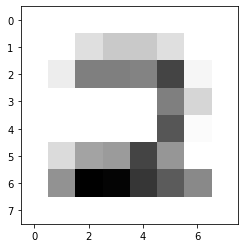

Predicted number: [0]


In [21]:
#imageResize = Image.open("2predict.jpg")
imageResize = Image.open("JustClickSave.jpg")
w , h = imageResize.size

l = (w - 300)/2
t = (h - 300)/2
r = (w + 300)/2
b = (h + 300)/2

imageResize = imageResize.crop((l, t, r, b)) 
imageResize.thumbnail((8,8))
imageResize.save("resizedForPrediction.png")

#userImage = imageio.imread("resizedForPrediction.png", as_gray=True)

userImage = imageio.imread("resizedForPrediction.png", as_gray=True)


finalAdjustment = userImage.flatten().reshape(1,-1)
#print(finalAdjustment)
drawingPrediction = knModel.predict(finalAdjustment)

plt.imshow(userImage, cmap = plt.get_cmap('gray_r'),interpolation="nearest")
plt.show()

print("Predicted number: {0}".format(drawingPrediction))

digit = str(drawingPrediction)
digit = digit.translate(str.maketrans('', '', string.punctuation))
numPred = open("prediction.txt", "w")
numPred.write(digit)
numPred.close()
